In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2=sns.load_dataset('titanic')

In [3]:
df1=df2

In [4]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df1.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

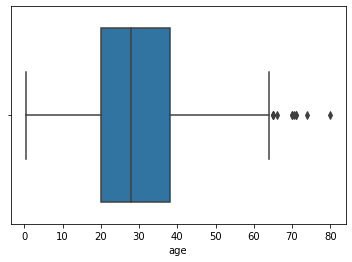

In [6]:
#checking the outliers
sns.boxplot(df1.age)

In [13]:
#filling the missing values
df1['age']=df1['age'].fillna(df1['age'].median())

In [14]:
df1.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
#drop the unwanted feature
df1=df1.drop("deck",axis=1)

In [16]:
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [17]:
df1.dropna(inplace=True)

In [18]:
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

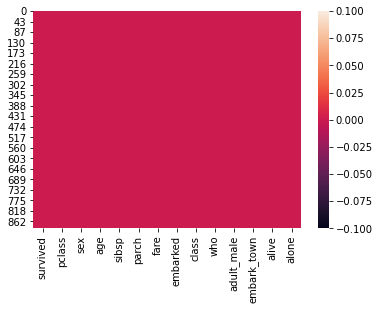

In [19]:
#visualize the null values by using heatmap
sns.heatmap(df1.isnull())

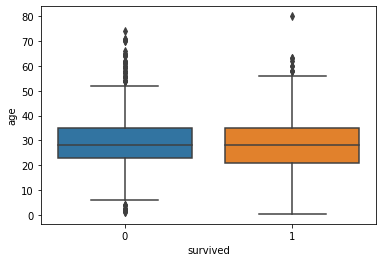

In [21]:
sns.boxplot(df1.survived,df1.age)

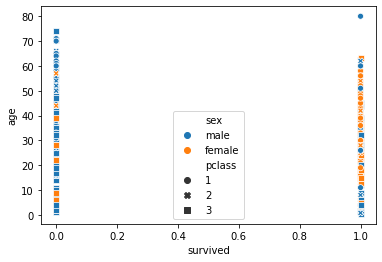

In [22]:
sns.scatterplot(x=df1.survived,y=df1.age,hue=df1['sex'],style=df1['pclass'])

In [23]:
df1.groupby("survived").std()

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,,,,,,,
0,0.735805,12.499986,1.288399,0.823166,31.388207,0.386320,0.466421
1,0.862763,13.672269,0.709838,0.773156,66.748773,0.438634,0.500035


In [24]:
df1.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


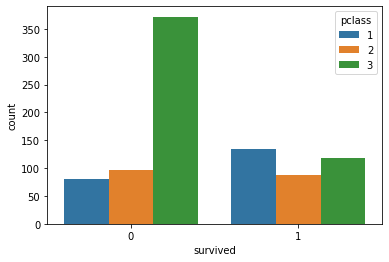

In [26]:
#analysis:- we notice that pclass 1 is more likely to survive as compare to pclass 3
sns.countplot(x=df1['survived'],hue=df1.pclass)

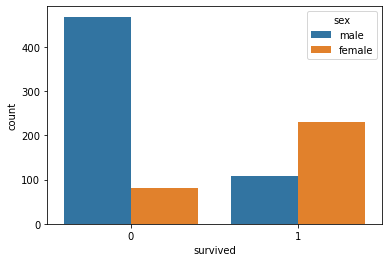

In [27]:
#Analysis:- we notice that female are thrice more likely to survive than male
sns.countplot(x=df1['survived'],hue=df1['sex'])

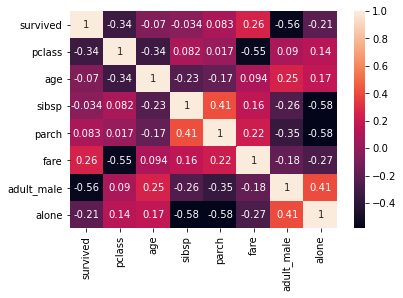

In [28]:
#here in the graph i understand the correlation between the features 
#survival and fare correlation in 0.25 
sns.heatmap(df1.corr(),annot=True)

Text(0.5, 1.0, 'SURVIVAL VS AGE')

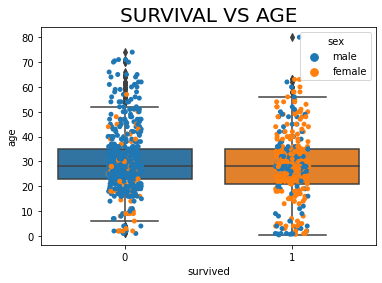

In [29]:
sns.boxplot(x="survived", y="age",data=df1)
sns.stripplot(x="survived", y="age",data=df1,jitter=True ,edgecolor="black",hue=df1['sex'])
plt.title("SURVIVAL VS AGE",fontsize=20)

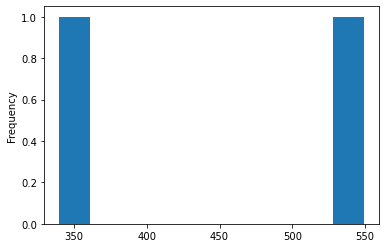

In [30]:
df1['survived'].value_counts().plot(kind='hist')

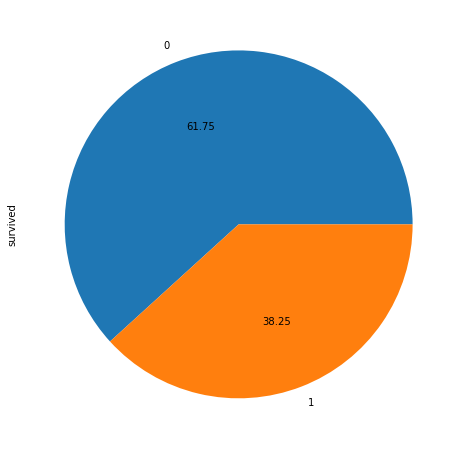

In [27]:
df['survived'].value_counts().plot(kind="pie",autopct='%.2f',figsize=(10,8))

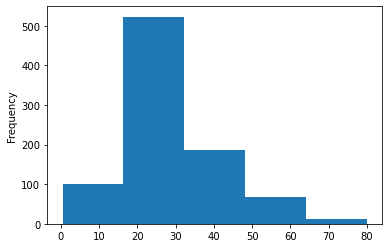

In [31]:
#Analysis:- we notice that more Age group peolpe are between 20-30 and very less 65-80
df1['age'].plot.hist(bins=5)

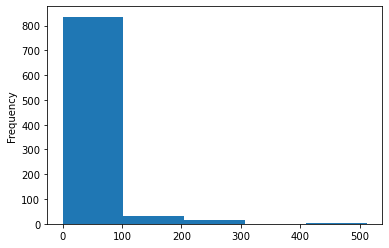

In [32]:
#ANALYSIS:-we observe that most of the ticket bought under 100 and very few 200-500
df1['fare'].plot.hist(bins=5)

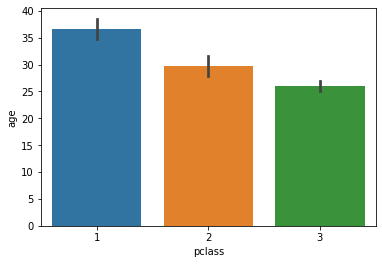

In [33]:
#ANALYSIS:-we observe here in pclass more young people are travel
sns.barplot(df1['pclass'],df1['age'])

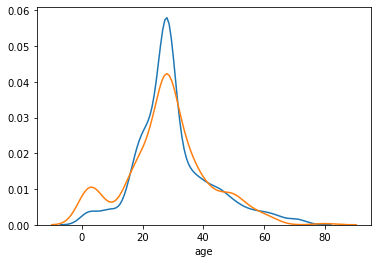

In [35]:
#for better understanding we use distplot 
sns.distplot(df1[df1['survived']==0]['age'],hist=False)
sns.distplot(df1[df1['survived']==1]['age'],hist=False)

In [37]:
pd.crosstab(df1['pclass'],df1['survived'])

survived,0,1
pclass,,
1,80,134
2,97,87
3,372,119


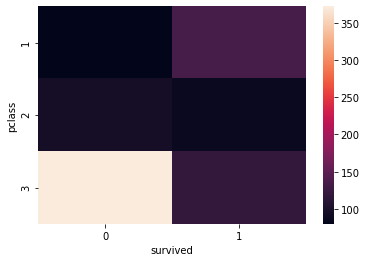

In [38]:
#ANALYSIS:-here we can esily vizualise pclass vs survived
sns.heatmap(pd.crosstab(df1['pclass'],df1['survived']))

In [158]:
df1.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [173]:
#one-hot encoding
gender=pd.get_dummies(df1['sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [174]:
city=pd.get_dummies(df1['embarked'],drop_first=True)
city.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [181]:
pas_class=pd.get_dummies(df1['pclass'],drop_first=True)
pas_class.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [182]:
df2=pd.concat([df1,gender,city,pas_class],axis=1)
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,0,1,0,1


In [183]:
df2.drop(['sex','pclass','embarked','parch','who','class','alone','embark_town','alive','adult_male'],axis=1,inplace=True)

In [184]:
df2.head()

,survived,age,sibsp,fare,male,Q,S,2,3
0,0,22.0,1,7.2500,1,0,1,0,1
1,1,38.0,1,71.2833,0,0,0,0,0
2,1,26.0,0,7.9250,0,0,1,0,1
3,1,35.0,1,53.1000,0,0,1,0,0
4,0,35.0,0,8.0500,1,0,1,0,1


# Training the model

In [185]:
X=df2.drop(['survived'],axis=1)
y=df2['survived']

In [186]:
X.head(5)

,age,sibsp,fare,male,Q,S,2,3
0,22.0,1,7.2500,1,0,1,0,1
1,38.0,1,71.2833,0,0,0,0,0
2,26.0,0,7.9250,0,0,1,0,1
3,35.0,1,53.1000,0,0,1,0,0
4,35.0,0,8.0500,1,0,1,0,1


In [187]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [190]:
print(" shape of x train",x_train.shape)
print(" shape of y train",y_train.shape)
print(" shape of x test",x_test.shape)
print(" shape of y test",y_test.shape)

 shape of x train (711, 8)
 shape of y train (711,)
 shape of x test (178, 8)
 shape of y test (178,)


In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
lr=LogisticRegression()

In [193]:
lr.fit(x_train,y_train)

LogisticRegression()

In [195]:
prediction=lr.predict(x_test)

In [196]:
from sklearn.metrics import classification_report

In [197]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.84      0.82      0.83       109\n           1       0.72      0.75      0.74        69\n\n    accuracy                           0.79       178\n   macro avg       0.78      0.79      0.78       178\nweighted avg       0.79      0.79      0.79       178\n'

In [200]:
from sklearn.metrics import confusion_matrix

In [201]:
confusion_matrix(y_test,prediction)

array([[89, 20],
       [17, 52]], dtype=int64)

In [202]:
from sklearn.metrics import accuracy_score

In [203]:
accuracy_score(y_test,prediction)

0.7921348314606742